In [1]:
# importing stuff
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib


Streaming output truncated to the last 5000 lines.
12/12 [==============================] - 0s 5ms/step - loss: 256.6957 - mae: 13.9506 - mse: 256.6957 - val_loss: 199.2307 - val_mae: 12.9375 - val_mse: 199.2307
Epoch 1502/4000
12/12 [==============================] - 0s 6ms/step - loss: 256.5816 - mae: 13.9468 - mse: 256.5816 - val_loss: 199.1302 - val_mae: 12.9338 - val_mse: 199.1302
Epoch 1503/4000
12/12 [==============================] - 0s 5ms/step - loss: 256.4677 - mae: 13.9430 - mse: 256.4677 - val_loss: 199.0329 - val_mae: 12.9301 - val_mse: 199.0329
Epoch 1504/4000
12/12 [==============================] - 0s 6ms/step - loss: 256.3566 - mae: 13.9393 - mse: 256.3566 - val_loss: 198.9355 - val_mae: 12.9264 - val_mse: 198.9355
Epoch 1505/4000
12/12 [==============================] - 0s 6ms/step - loss: 256.2463 - mae: 13.9356 - mse: 256.2463 - val_loss: 198.8387 - val_mae: 12.9228 - val_mse: 198.8387
Epoch 1506/4000
12/12 [==============================] - 0s 6ms/step - loss: 256

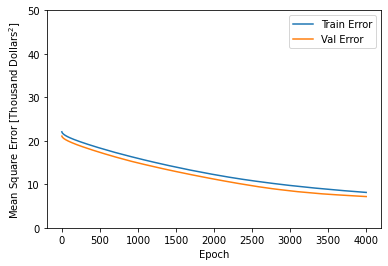

In [2]:
# setting up the labels and features, as well as some metrics
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()
print(train_features)
print(train_labels)
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std


# setting up the model
model = keras.Sequential([Dense(20, activation=tf.nn.relu, input_shape=[len(train_features[0])]), Dense(1)])

# compiling
model.compile(optimizer='adagrad', loss='mse', metrics=['mae', 'mse'])

# training the model
history = model.fit(train_features, train_labels, epochs=4000, verbose=1, validation_split = 0.1)

# making the graph
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
plt.plot(hist['epoch'], hist['mae'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
plt.legend()
plt.ylim([0,50])

# saving
model.save('DLNN_Housing_Boston')

In [ ]:
# testing the saved model
my_new_model = tf.keras.models.load_model('DLNN_Housing_Boston')
test_features_norm = (test_features - train_mean) / train_std
mse, _, _ = model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))


4/4 [==============================] - 0s 3ms/step - loss: 13.0975 - mae: 2.5414 - mse: 13.0975
Root Mean Square Error on test set: 3.619
